In [1]:
import pandas as pd
import copy
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
df_copy = pd.read_csv("Wildfire_Dataset.csv")

/tmp/ipykernel_4893/3328195843.py:1: DtypeWarning: Columns (7,8,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_copy = pd.read_csv("Wildfire_Dataset.csv")


In [3]:
df = copy.deepcopy(df_copy)
df.drop(["Unnamed: 0", "FIPS_CODE"], axis=1, inplace=True)

In [4]:
columns = {'FIRE_YEAR': "year",
       'DISCOVERY_DATE': "discovery_date", 'DISCOVERY_DOY': "discovery_doy", 'DISCOVERY_TIME': "discovery_time",
       'NWCG_CAUSE_CLASSIFICATION': "cause_class", 'NWCG_GENERAL_CAUSE': "cause_description",
       'NWCG_CAUSE_AGE_CATEGORY': "cause_age", 'CONT_DATE': "contained_date", 'CONT_DOY': "contained_doy", 'CONT_TIME': "contained_time",
       'FIRE_SIZE': "size", 'FIRE_SIZE_CLASS': "size_class", 'LATITUDE': "latitude", 'LONGITUDE': "longitude", 
       'STATE': "state", 'COUNTY': "county", 'FIPS_CODE': "fips_code", 'FIPS_NAME': "fips_name"}

df.rename(mapper= lambda column: columns[column] if column in columns.keys() else column, axis=1, inplace=True)

df["discovery_month"] = df["discovery_date"].apply(lambda date: date.split("/")[1])
df["discovery_day"] = df["discovery_date"].apply(lambda date: date.split("/")[0])


def calc_duration(series: pd.Series):
     if any(math.isnan(x) if (type(x) is not str) else False for x in [series["contained_doy"], series ["discovery_doy"], series["contained_date"], series["year"]]):
          return None
     return series["contained_doy"] - series ["discovery_doy"] + (int(series["contained_date"].split("/")[-1]) - series["year"]) * 365 + 1

df["duration"] = df.apply(func= calc_duration, axis=1)

In [5]:
df

,year,discovery_date,discovery_doy,discovery_time,cause_class,cause_description,cause_age,contained_date,contained_doy,contained_time,size,size_class,latitude,longitude,state,county,fips_name,discovery_month,discovery_day,duration
0,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,CA,63.0,Plumas County,2,2,1.0
1,2004,5/12/2004,133,845.0,Natural,Natural,NaN,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer County,12,5,1.0
2,2004,5/31/2004,152,1921.0,Human,Debris and open burning,NaN,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,CA,17.0,El Dorado County,31,5,1.0
3,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine County,28,6,6.0
4,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine County,28,6,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2020,6/5/2020,157,1741.0,Natural,Natural,NaN,NaN,NaN,NaN,1.00,B,39.037890,-108.959500,CO,NaN,NaN,5,6,NaN
2303562,2020,7/11/2020,193,1958.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,100.00,D,37.148611,-119.503056,CA,Madera,Madera County,11,7,NaN
2303563,2020,8/27/2020,240,1911.0,Natural,Natural,NaN,NaN,NaN,NaN,50.00,C,46.151370,-114.442800,MT,NaN,NaN,27,8,NaN
2303564,2020,8/17/2020,230,755.0,Natural,Natural,NaN,8/20/2020,233.0,1900.0,24892.00,G,46.670340,-120.114500,WA,Yakima,Yakima County,17,8,4.0


In [ ]:
# Topic: How climate change affects wildfires in the USA



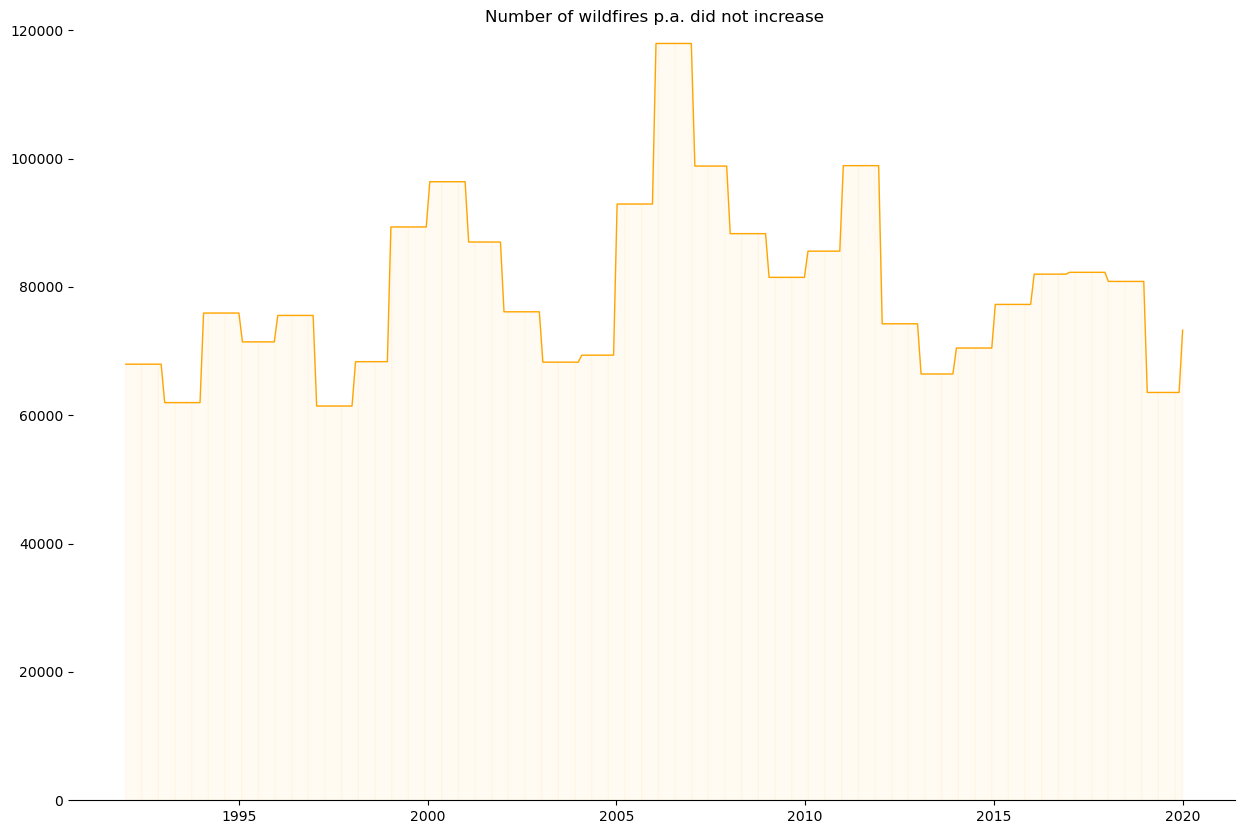

In [6]:
df_ = df.groupby("year").size()

x_new = np.linspace(1992, 2020, 300)  # Erhöht die Anzahl der Punkte für eine glattere Kurve
spl = make_interp_spline(df_.index, df_.values, k=0)  # Spline-Interpolation
y_smooth = spl(x_new)

fig, ax = plt.subplots(1, figsize=(15, 10))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)

ax.set_ylim([0, 120_000])
ax.fill_between(x_new, y_smooth, color="Orange", alpha=0.05, hatch="|")


ax.set_title(label="Number of wildfires p.a. did not increase")
#plt.text(5, 0.5, 'Maximalwert', fontsize=12, ha='center')

plt.plot(x_new, y_smooth, color="Orange", markersize=8, linewidth=1)

<Axes: xlabel='year'>

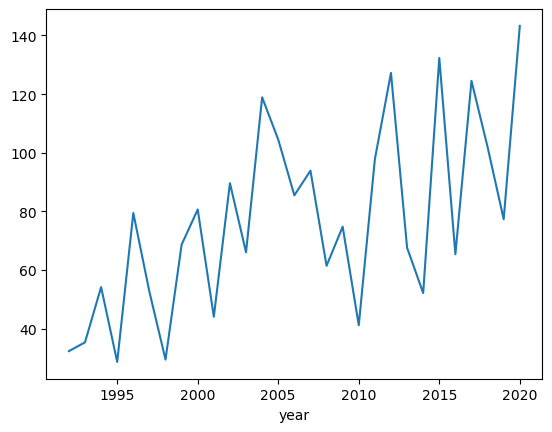

In [7]:
df.groupby("year")["size"].mean().plot()

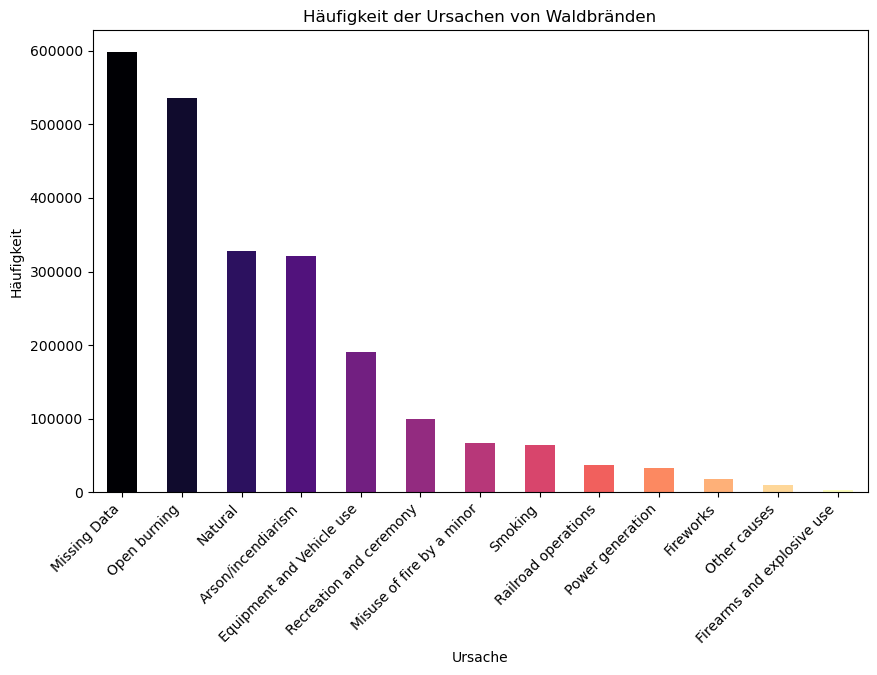

In [20]:
#Christophs Code
cause_counts = df['cause_description'].value_counts()

plt.figure(figsize=(10,6))

colors = plt.cm.magma(np.linspace(0, 1, len(cause_counts)))

bars = cause_counts.plot(kind = 'bar', color = colors)
plt.title('Häufigkeit der Ursachen von Waldbränden')
plt.xlabel('Ursache')
plt.ylabel('Häufigkeit')

new_labels = ['Missing Data', 'Open burning', 'Natural', 'Arson/incendiarism', 'Equipment and Vehicle use', 'Recreation and ceremony', 'Misuse of fire by a minor', 'Smoking', 'Railroad operations', 'Power generation', 'Fireworks', 'Other causes', 'Firearms and explosive use']

plt.xticks(ticks = range(len(new_labels)), labels = new_labels, rotation = 45, ha = 'right')
plt.show()